# Лабораторная работа №2. Первичный анализ данных с Pandas
### Обзор библиотеки Pandas

**Pandas** - это библиотека, предоставляющая широкие возможности для анализа данных. С ее помощью удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

%matplotlib inline
warnings.simplefilter('ignore') # отключаем предупреждения Anaconda

Основными структурами данных в Pandas являются классы Series и DataFrame:
- Series - это одномерный индексированный массив данных некоторого фиксированного типа;
- DataFrame - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. 

Можно представлять DataFrame как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

**Создание объекта Series из 5 элементов, индексированных буквами:**

In [3]:
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 'Charles', 'Ann']) 
print(salaries)     

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64


In [4]:
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [5]:
print(salaries.Andrew == salaries['Andrew'])

True


In [6]:
salaries['Carl'] = np.nan

In [7]:
salaries.fillna(salaries.median(), inplace=True)
print(salaries)

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64


**Series поддерживает пропуски в данных (в виде np.nan значений).**

In [8]:
salaries.c = np.nan
print(salaries)

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64


**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [9]:
print('Second element of salaries is', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')
print('There are', len(salaries[salaries > 0]), 'positive elements in salaries\n')
# Series obects can be the arguments for Numpy functions
print(np.exp(salaries))

Second element of salaries is 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

There are 5 positive elements in salaries

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64


### DataFrame

**Объект DataFrame можно создать из массива numpy, указав названия строк и столбцов.**

In [10]:
df1 = pd.DataFrame(np.random.randn(5, 3), 
                   index=['o1', 'o2', 'o3', 'o4', 'o5'], 
                   columns=['f1', 'f2', 'f3'])
df1

f1        f2        f3
o1 -0.122422 -1.046910  0.188517
o2  0.489155  1.488996 -0.458118
o3 -1.432017 -0.347659  0.917784
o4 -0.680275 -0.445557  0.299806
o5 -0.361537  0.104247 -0.699386

**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [11]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

A  B      C
0  0.273772  a  False
1  0.443309  b  False
2  0.355914  c  False
3  0.734828  d   True
4  0.973489  e   True

**Обращение к элементам (или целым кускам фрейма):**

In [12]:
print(r'The element in position [3, B] is {}'.format(df2.at[3, 'B']))
print(df2.loc[[1, 4], ['A', 'B']])

The element in position [3, B] is d
          A  B
1  0.443309  b
4  0.973489  e


**Изменение элементов и добавление новых:**

In [13]:
df2.at[2, 'B'] = 'f'
df2

A  B      C
0  0.273772  a  False
1  0.443309  b  False
2  0.355914  f  False
3  0.734828  d   True
4  0.973489  e   True

In [14]:
df2.loc[5] = [3.1415, 'c', False]
df2

A  B      C
0  0.273772  a  False
1  0.443309  b  False
2  0.355914  f  False
3  0.734828  d   True
4  0.973489  e   True
5  3.141500  c  False

In [15]:
df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2)
df3

A         B         C
o1 -0.122422  -1.04691  0.188517
o2  0.489155     1.489 -0.458118
o3 -1.432017 -0.347659  0.917784
o4 -0.680275 -0.445557  0.299806
o5 -0.361537  0.104247 -0.699386
0   0.273772         a  0.000000
1   0.443309         b  0.000000
2   0.355914         f  0.000000
3   0.734828         d  1.000000
4   0.973489         e  1.000000
5   3.141500         c  0.000000

**Обработка пропущенных значений**

In [16]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

A         B         C
o1 -0.122422 -1.046910  0.188517
o2       NaN  1.488996 -0.458118
o3 -1.432017 -0.347659  0.917784
o4 -0.680275 -0.445557       NaN
o5 -0.361537  0.104247 -0.699386

**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [17]:
pd.isnull(df1)

A      B      C
o1  False  False  False
o2   True  False  False
o3  False  False  False
o4  False  False   True
o5  False  False  False

**Можно удалить все строки, где есть хотя бы один пропуск.**

In [18]:
df1.dropna(how='any')

A         B         C
o1 -0.122422 -1.046910  0.188517
o3 -1.432017 -0.347659  0.917784
o5 -0.361537  0.104247 -0.699386

**Пропуски можно заменить каким-то значением.**

In [19]:
df1.fillna(0)

A         B         C
o1 -0.122422 -1.046910  0.188517
o2  0.000000  1.488996 -0.458118
o3 -1.432017 -0.347659  0.917784
o4 -0.680275 -0.445557  0.000000
o5 -0.361537  0.104247 -0.699386

## Пример первичного анализа данных с Pandas

### Чтение из файла и первичный анализ

На практике данные, с которыми нам предстоит работать, необходимо считать из некоторого файла. Рассмотрим работу с данными при помощи DataFrame на примере следующего набора данных. 

Имеется список опрошенных людей. Для каждого опрошенного известна следующая информация: 
- заработная плата за час работы; 
- опыт работы;
- образование; 
- внешняя привлекательность (в баллах от 1 до 5);
- бинарные признаки: 
 - пол; 
 - семейное положение;
 - состояние здоровья (хорошее/плохое);
 - членство в профсоюзе;
 - цвет кожи (белый/чёрный);
 - занятость в сфере обслуживания (да/нет).

In [4]:
df = pd.read_csv('./data/beauty.csv', sep = ';')

**Посмотрим на размер данных и названия признаков.**

In [5]:
print(df.shape)
print(df.columns.values)

(1260, 10)
['wage' 'exper' 'union' 'goodhlth' 'black' 'female' 'married' 'service'
 'educ' 'looks']


In [7]:
df.head(10)

wage  exper  union  goodhlth  black  female  married  service  educ  looks
0   5.73     30      0         1      0       1        1        1    14      4
1   4.28     28      0         1      0       1        1        0    12      3
2   7.96     35      0         1      0       1        0        0    10      4
3  11.57     38      0         1      0       0        1        1    16      3
4  11.42     27      0         1      0       0        1        0    16      3
5   3.91     20      0         0      0       1        1        0    12      3
6   8.76     12      0         1      0       0        1        0    16      3
7   7.69      5      1         1      0       0        0        0    16      4
8   5.00      5      0         1      0       1        0        0    16      3
9   3.89     12      0         1      0       1        0        0    12      3

**При работе с большими объёмами данных бывает удобно посмотреть только на небольшие части фрейма (например, начало).**

In [23]:
df.head(4)

wage  exper  union  goodhlth  black  female  married  service  educ  looks
0   5.73     30      0         1      0       1        1        1    14      4
1   4.28     28      0         1      0       1        1        0    12      3
2   7.96     35      0         1      0       1        0        0    10      4
3  11.57     38      0         1      0       0        1        1    16      3

Метод **describe** показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [24]:
df.describe()

wage        exper        union     goodhlth        black  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean      6.306690    18.206349     0.272222     0.933333     0.073810   
std       4.660639    11.963485     0.445280     0.249543     0.261564   
min       1.020000     0.000000     0.000000     0.000000     0.000000   
25%       3.707500     8.000000     0.000000     1.000000     0.000000   
50%       5.300000    15.000000     0.000000     1.000000     0.000000   
75%       7.695000    27.000000     1.000000     1.000000     0.000000   
max      77.720000    48.000000     1.000000     1.000000     1.000000   

            female      married      service         educ        looks  
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000  
mean      0.346032     0.691270     0.273810    12.563492     3.185714  
std       0.475892     0.462153     0.446089     2.624489     0.684877  
min       0.000000     0.000000     0.000000     5.000000     1.000000  
25%       0.000000     0.000000     0.000000    12.000000     3.000000  
50%       0.000000     1.000000     0.000000    12.000000     3.000000  
75%       1.000000     1.000000     1.000000    13.000000     4.000000  
max       1.000000     1.000000     1.000000    17.000000     5.000000

**DataFrame можно отсортировать по значению какого-нибудь из признаков. В нашем случае, например, по размеру заработной платы.**

In [25]:
df.sort_values(by='wage', ascending = False).head()

wage  exper  union  goodhlth  black  female  married  service  educ  \
602  77.72      9      1         1      1       1        1        1    13   
269  41.67     16      0         0      0       0        1        0    13   
415  38.86     29      0         1      0       0        1        0    13   
69   32.79     33      0         1      0       0        1        1    16   
290  31.09     32      0         0      0       0        1        0    13   

     looks  
602      4  
269      4  
415      3  
69       4  
290      3

In [26]:
df.sort_values(by=['female', 'wage'], ascending=[True, False]).head()

wage  exper  union  goodhlth  black  female  married  service  educ  \
269  41.67     16      0         0      0       0        1        0    13   
415  38.86     29      0         1      0       0        1        0    13   
69   32.79     33      0         1      0       0        1        1    16   
290  31.09     32      0         0      0       0        1        0    13   
68   29.98     12      0         1      0       0        1        1    17   

     looks  
269      4  
415      3  
69       4  
290      3  
68       3

### Индексация и извлечение данных

DataFrame можно по-разному индексировать. В связи с этим рассмотрим различные способы индексации и извлечения нужных нам данных из DataFrame на примере простых вопросов.

Для извлечения отдельного столбца можно использовать конструкцию вида DataFrame['Name']. Воспользуемся этим для ответа на вопрос: **какова доля людей с хорошим здоровьем среди опрошенных?**

In [27]:
df['goodhlth'].mean()

0.9333333333333333

Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: df[P(df['Name'])], где P - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name. Воспользуемся этим для ответа на вопрос: **какова средняя заработная плата среди женщин?**

In [28]:
df[df['female'] == 1].head()

wage  exper  union  goodhlth  black  female  married  service  educ  looks
0  5.73     30      0         1      0       1        1        1    14      4
1  4.28     28      0         1      0       1        1        0    12      3
2  7.96     35      0         1      0       1        0        0    10      4
5  3.91     20      0         0      0       1        1        0    12      3
8  5.00      5      0         1      0       1        0        0    16      3

In [29]:
df[(df['goodhlth'] == 1) & (df['female'] == 1)].head()

wage  exper  union  goodhlth  black  female  married  service  educ  looks
0  5.73     30      0         1      0       1        1        1    14      4
1  4.28     28      0         1      0       1        1        0    12      3
2  7.96     35      0         1      0       1        0        0    10      4
8  5.00      5      0         1      0       1        0        0    16      3
9  3.89     12      0         1      0       1        0        0    12      3

In [30]:
df[(df['female'] == 0)]['wage'].mean() - df[(df['female'] == 1)]['wage'].mean()

3.069465017368837

**Какова максимальная заработная плата среди мужчин, имеющих членство в профсоюзе, и с опытом работы до 10 лет?**

In [31]:
df[(df['female'] == 0) & (df['union'] == 1) & (df['exper'] < 10)]['wage'].max()

12.82

**Применение функции к каждому столбцу:**

In [32]:
df.apply(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

**Группирование данных в зависимости от значения признака *looks* и подсчет среднего значения по каждому столбцу в каждой группе.**

In [33]:
# Сначала просто описание по признаку looks
df['looks'].describe()

count    1260.000000
mean        3.185714
std         0.684877
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: looks, dtype: float64

In [34]:
g = df.groupby('looks') 

for (i, sub_df) in g:
    print(sub_df['wage'].mean(), sub_df['looks'].mean())

4.621538461538462 1.0
5.328802816901409 2.0
6.504598337950134 3.0
6.299340659340659 4.0
7.38842105263158 5.0


**Обращение к конкретной группе:**

In [35]:
d1 = g.get_group(1)
d1

wage  exper  union  goodhlth  black  female  married  service  educ  \
28     8.35     41      0         0      0       0        1        1    16   
200    3.75     36      0         1      0       0        0        0    12   
248   10.99     40      0         1      0       0        1        0    12   
327    1.65     24      0         1      0       1        0        1    13   
751    7.93     39      1         1      0       0        1        0    12   
837    5.56     10      0         1      0       0        1        0    13   
842    7.69      9      1         0      0       0        1        0    12   
877    2.73     41      0         1      0       0        1        0     8   
980    2.31     35      1         1      0       0        1        0     5   
1126   3.46     26      0         1      0       1        0        1     5   
1149   1.26     32      0         1      1       1        0        0     5   
1171   2.25     12      0         1      1       1        0        0     5   
1213   2.15      6      0         1      0       1        1        1    12   

      looks  
28        1  
200       1  
248       1  
327       1  
751       1  
837       1  
842       1  
877       1  
980       1  
1126      1  
1149      1  
1171      1  
1213      1

### Визуализация в Pandas

Метод **scatter_matrix** позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали). Проделаем это для небинарных признаков.

In [36]:
pd.plotting.scatter_matrix(df[['wage', 'exper', 'educ', 'looks']], 
                  figsize=(15, 15), diagonal='kde')
plt.show()

**Для каждого признака можно построить отдельную гистограмму:**

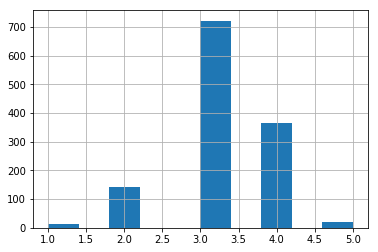

In [37]:
df['looks'].hist()

**Или сразу для всех признаков:**

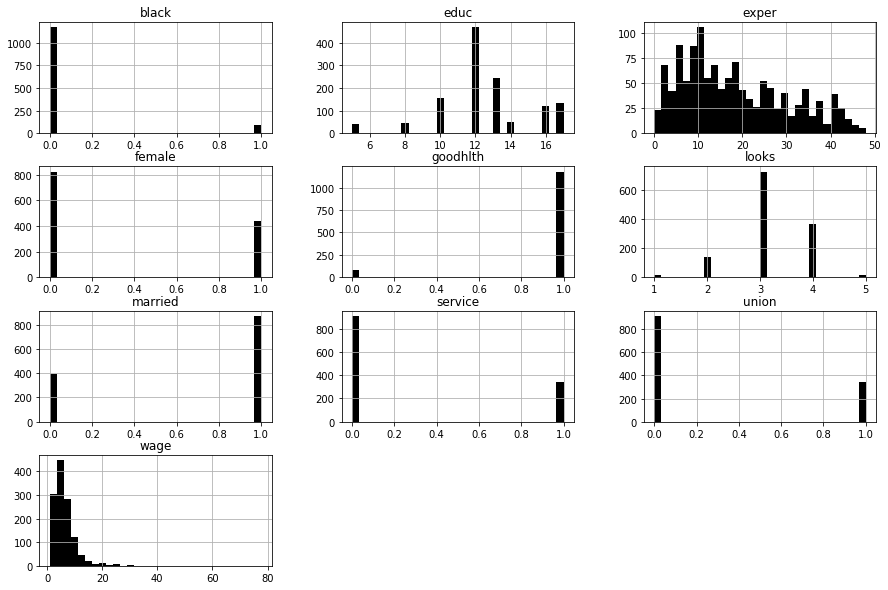

In [38]:
df.hist(color = 'k', bins = 30, figsize=(15,10))
plt.show()

Полезным также является график типа **box plot** ("ящик с усами"). Он позволяет компактно визуализировать основные характеристики (медиану, нижний и верхний квартили, минимальное и максимальное значение, выбросы) распределения признаков.

In [39]:
df.boxplot(column='exper', by='looks')
plt.show()

**Можно сделать это, сгруппировав данные по какому-либо другому признаку:**

In [40]:
df.boxplot(column='exper',  by=['female', 'black'], figsize=(10,10))
plt.show()

# Задание к лабораторной работе №1

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже лежат в локальной папке). Решение должно быть оформлено в виде файла отчета.**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [8]:
data = pd.read_csv('./data/adult.data.csv')
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [ ]:
data.describe()

**1. Сколько представителей различных рас (признак *race*) представлено в этом наборе данных?**

In [1]:
# Ваш код здесь

**2. Каков средний возраст чернокожих женщин?**

In [2]:
# Ваш код здесь

**3. Какова доля граждан Японии (признак *native-country*)?**

In [3]:
# Ваш код здесь

**4. Каковы средние значения и среднеквадратичные отклонения возраста тех мужчин, которые получают более 50K в год (признак *salary*) и тех, которые получают менее 50K в год?**

In [4]:
# Ваш код здесь

**5. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [5]:
# Ваш код здесь

**6. Выведите статистику возраста каждого пола для каждой страны (признак *naive-country*). Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин из Японии.**

In [6]:
# Ваш код здесь

**7. Правда ли, что доля зарабатывающих много (>50K) больше среди женатых чем среди холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [7]:
# Ваш код здесь

**8. Какое максимальное число часов мужчины и женщины работают в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [8]:
# Ваш код здесь

**9. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой расы.**

In [9]:
# Ваш код здесь

Использованы материалы **"Открытого курса по машинному обучению"**. Авторы: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий и Data Scientist в Segmento Екатерина Демидова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.